In [12]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scout import io
from scout import utils
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/d35_vs_d60/Lancaster_d35/20190430_11_36_09_AA-4.30.19-org1_488LP12p5_561LP120_642LP50'
os.listdir(working_dir)

['organoid_features.xlsx',
 'ventricle_normal_density.pdf',
 'dataset',
 'individual_ventricle_cyto.xlsx',
 'single_org_UMAP_clusters.pdf',
 'cyto_labels.npy',
 'cyto_names.csv',
 'individual_ventricle_cellfreq.xlsx']

In [8]:
df = pd.read_excel(os.path.join(working_dir, 'individual_ventricle_cellfreq.xlsx'), index_col=0)
df2 = pd.read_excel(os.path.join(working_dir, 'individual_ventricle_cyto.xlsx'), index_col=0)

df['dist'] = df2['dist']
df['dist_adj'] = df['dist'] - df['eq_diam']/2

df.head()

,sox2_count,tbr1_count,dn_count,sox2_freq,tbr1_freq,dn_freq,eq_diam,volume,dist,dist_adj
0,24436,130823,68937,0.108994,0.583521,0.307485,93.816344,4.323487e+05,195.504012,148.595840
1,1009,5676,5524,0.082644,0.464903,0.452453,4.846178,5.959320e+01,85.602234,83.179145
2,78802,1253809,997987,0.033812,0.537977,0.428211,254.819267,8.663540e+06,308.791898,181.382265
3,164435,946349,733044,0.089181,0.513252,0.397566,247.764704,7.963737e+06,282.038282,158.155930
4,19803,112044,107598,0.082704,0.467932,0.449364,69.361853,1.747273e+05,269.501738,234.820812


In [10]:
data_flatten = {'freq': pd.concat([df['sox2_freq'], df['tbr1_freq'], df['dn_freq']]),
                'type': len(df) * ['SOX2'] + len(df) * ['TBR1'] + len(df) * ['DN'],
                'eq_diam': 3 * list(df['eq_diam'])}
df_flatten = pd.DataFrame(data_flatten)

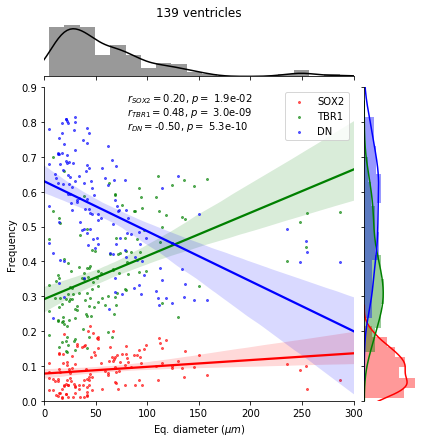

In [27]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_flatten['eq_diam'], ax=p.ax_marg_x, color='k')
sns.distplot(df['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 300])
p.ax_joint.set_ylim([0, 0.9])
p.ax_joint.legend()
p.ax_marg_x.set_title("{} ventricles".format(len(df)))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df['eq_diam'], df['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df['eq_diam'], df['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df['eq_diam'], df['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.86])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.82])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.78])

plt.savefig(os.path.join(working_dir, 'ventricle_size_vs_celltypes.pdf'), bbox_inches='tight')

plt.show()